<a href="https://colab.research.google.com/github/Engr-Genius/DATA-ANALYSIS-WITH-PYTHON/blob/main/Data_Visualization_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive

MyDrive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/job_change_data.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,Oct-49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


Filter rows where City_Development_Index > 0.8 and Company_Size > 3

In [5]:
import numpy as np

def convert_company_size(size_str):
    if pd.isna(size_str):
        return np.nan
    s = str(size_str).strip()
    if '-' in s:
        # Handle 'Oct-49' as a specific case, assuming 'Oct' is a typo for '10'
        if s.lower() == 'oct-49':
            return 10
        try:
            return int(s.split('-')[0]) # e.g., '10-49' becomes 10
        except ValueError:
            return np.nan # If the first part is not a valid integer
    elif '<' in s:
        return 1 # e.g., '<10' becomes 1 (as lowest possible size)
    elif '+' in s:
        try:
            return int(s.replace('+', '')) # e.g., '10000+' becomes 10000
        except ValueError:
            return np.nan
    else:
        try:
            return int(s)
        except ValueError:
            return np.nan # For any other unparseable strings

df['company_size_numeric'] = df['company_size'].apply(convert_company_size)

filtered_df = df[(df['city_development_index'] > 0.8) &
                 (df['company_size_numeric'] > 3)]

Use iloc to select first 10 rows and specific columns

In [6]:
subset_df = df.iloc[:10][['experience', 'education_level']]

Group by Relevant_Experience and compute average CDI

In [7]:
avg_cdi = df.groupby('relevent_experience')['city_development_index'].mean()

Group by Company_Size and count unique entries in Last_New_Job

In [8]:
unique_last_new_job = df.groupby('company_size')['last_new_job'].nunique()

Frequency distribution of Company_Type

In [9]:
company_type_freq = df['company_type'].value_counts()

Identify numerical columns with missing values and fill with mean

In [10]:

num_cols = df.select_dtypes(include='number')

# columns with missing values
missing_num_cols = num_cols.columns[num_cols.isnull().any()]

# fill with mean
df[missing_num_cols] = df[missing_num_cols].fillna(df[missing_num_cols].mean())

Drop rows where >50% of data is missing + analyze impact

In [11]:

initial_rows = df.shape[0]

df_cleaned = df.dropna(thresh=df.shape[1] * 0.5)

final_rows = df_cleaned.shape[0]
impact = initial_rows - final_rows

print("Rows removed:", impact)

Rows removed: 0


Query rows where Experience > 10 and Company_Size == 7

In [13]:
import numpy as np

def convert_experience(exp_str):
    if pd.isna(exp_str):
        return np.nan
    s = str(exp_str).strip()
    if s == '<1':
        return 0
    elif s == '>20':
        return 21 # Representing 'more than 20 years'
    else:
        try:
            return int(s)
        except ValueError:
            return np.nan # For any other unparseable strings

df['experience_numeric'] = df['experience'].apply(convert_experience)

query_df = df[(df['experience_numeric'] > 10) & (df['company_size_numeric'] == 7)]

Create new feature Experience_Gap

In [14]:
import numpy as np

def convert_last_new_job(job_str):
    if pd.isna(job_str):
        return np.nan
    s = str(job_str).strip()
    if s == 'never':
        return 0
    elif s == '>4':
        return 5 # Representing 'more than 4 years'
    else:
        try:
            return int(s)
        except ValueError:
            return np.nan

df['last_new_job_numeric'] = df['last_new_job'].apply(convert_last_new_job)
df['Experience_Gap'] = df['experience_numeric'] - df['last_new_job_numeric']

Normalize CDI to 0–1 scale

In [15]:
df['CDI_Normalized'] = (df['city_development_index'] -
                        df['city_development_index'].min()) / \
                       (df['city_development_index'].max() -
                        df['city_development_index'].min())

Create cdi_per column, merge, and analyze

In [16]:

# Create new column

df_new = pd.DataFrame()
df_new['cdi_per'] = df['city_development_index'] * 100
df_new['id'] = df.index  # key for merging

# Add ID to original DF

df['id'] = df.index

# Merge

merged_df = pd.merge(df, df_new, on='id', how='left')

# Insights you can analyze:

merged_df[['city_development_index', 'cdi_per']].head()

,city_development_index,cdi_per
0,0.827,82.7
1,0.920,92.0
2,0.624,62.4
3,0.827,82.7
4,0.920,92.0


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
df = pd.read_excel('/content/drive/MyDrive/students_performance_records.xlsx')
df.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,Male,Caucasian,Some College,19.833723,7,1,2,0,0,YES,0,2.929196,2
1,1002,18,Female,Caucasian,High School,15.408756,0,0,1,0,0,No,0,3.042915,1
2,1003,15,Female,Asian,Bachelor's,4.210570,26,0,2,0,0,No,0,0.112602,4
3,1004,17,Male,Caucasian,Bachelor's,10.028829,14,0,3,1,0,No,0,2.054218,3
4,1005,17,Male,Caucasian,Some College,4.672495,17,1,3,0,0,No,0,1.288061,4


# Check & Handle Missing/Inconsistent Data

In [21]:
# Check info
df.info()

# Check missing values
df.isnull().sum()

# Drop duplicates if any
df = df.drop_duplicates()

# Fill missing numerical values with mean
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(include='object').columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2390 non-null   object 
 3   Ethnicity          2391 non-null   object 
 4   ParentalEducation  2391 non-null   object 
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   object 
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   int64  
dtypes: float64(2), int64(9), object(4)
memory usage: 280.4+ KB


PART 2 — BAR CHART: AVERAGE GPA BY GRADE CLASS

In [22]:
# Compute average GPA per GradeClass

avg_gpa = df.groupby('GradeClass')['GPA'].mean().sort_values()
avg_gpa

,GPA
GradeClass,
4,1.208041
3,2.215545
2,2.659742
1,3.001673
0,3.102942


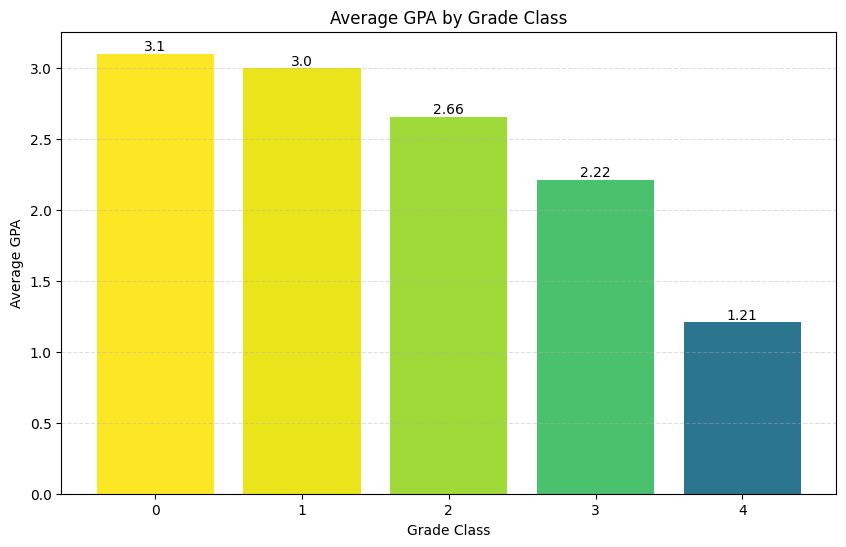

In [23]:
# Create Bar Chart With Colormap

plt.figure(figsize=(10, 6))

colors = plt.cm.viridis(avg_gpa / avg_gpa.max())  # gradient color map

bars = plt.bar(avg_gpa.index, avg_gpa.values, color=colors)

# Annotate GPA values on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02,
             round(yval, 2), ha='center', fontsize=10)

plt.title("Average GPA by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("Average GPA")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

PART 3 — SCATTER MATRIX (StudyTimeWeekly, Absences, GPA)

<Figure size 1000x1000 with 0 Axes>

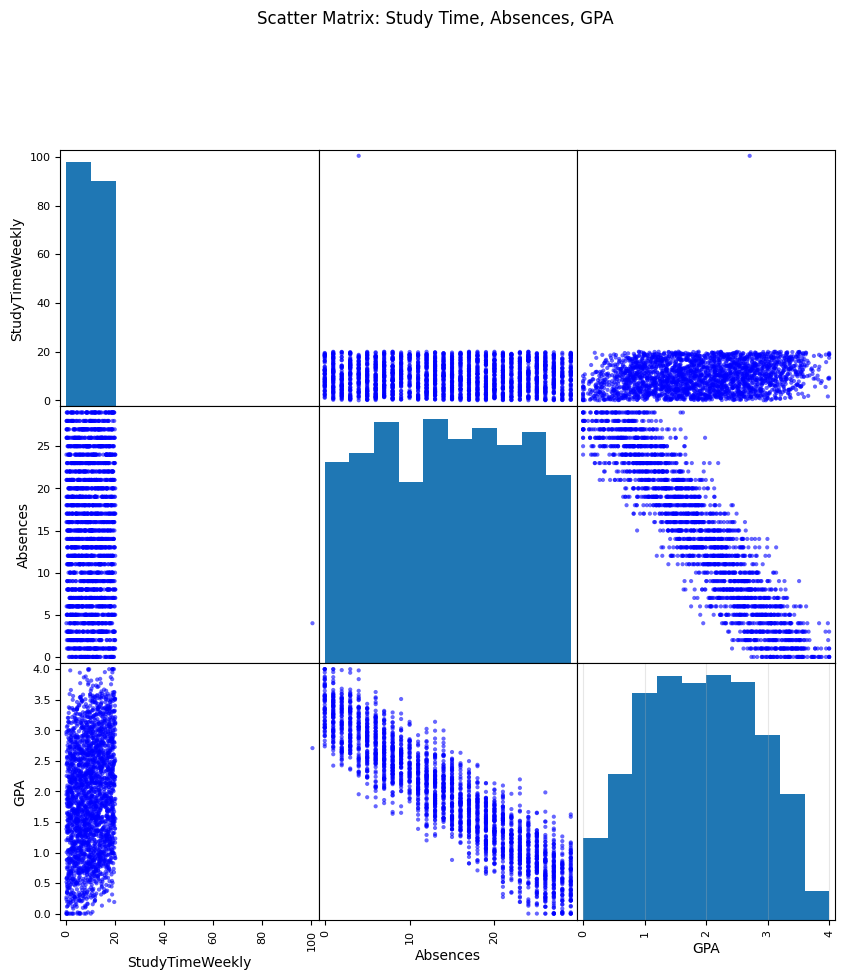

In [24]:

cols = ['StudyTimeWeekly', 'Absences', 'GPA']

plt.figure(figsize=(10, 10))
scatter_matrix(df[cols], figsize=(10, 10),
               diagonal='hist', color='blue', alpha=0.6)

plt.suptitle("Scatter Matrix: Study Time, Absences, GPA", y=1.02)
plt.grid(alpha=0.3)
plt.show()

PART 4 — BOX PLOT: STUDY TIME BY GRADE CLASS

/tmp/ipython-input-1435148524.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=grade_classes, patch_artist=True)


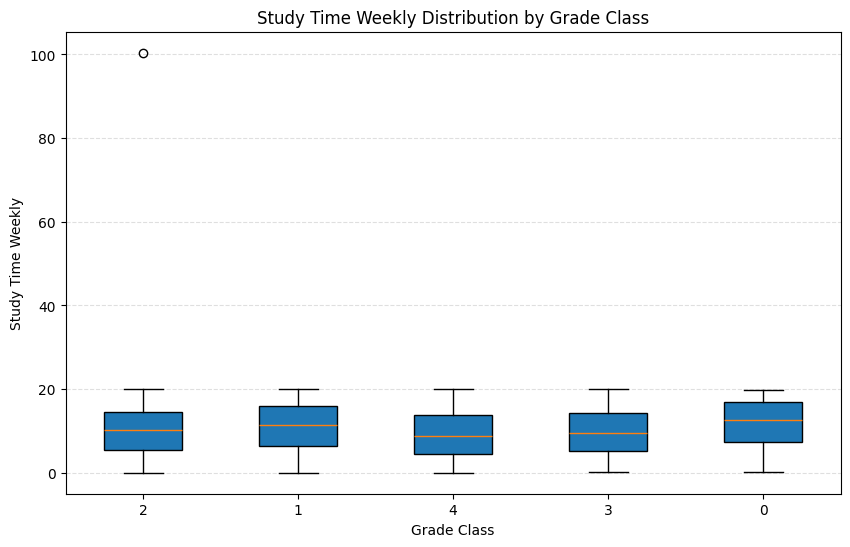

In [25]:

plt.figure(figsize=(10, 6))

grade_classes = df['GradeClass'].unique()
colors = plt.cm.tab10(range(len(grade_classes)))  # different color for each box

data = [df[df['GradeClass'] == gc]['StudyTimeWeekly'] for gc in grade_classes]

plt.boxplot(data, labels=grade_classes, patch_artist=True)

# Color each box
for patch, color in zip(plt.gca().artists, colors):
    patch.set_facecolor(color)

plt.title("Study Time Weekly Distribution by Grade Class")
plt.xlabel("Grade Class")
plt.ylabel("Study Time Weekly")
plt.grid(axis='y', linestyle='--', alpha=0.4)

plt.show()

Learning Assignment 3
Recreate and analyze the provided Seaborn plots using the dataset. Ensure proper styling, labels, and visual clarity.

In [28]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/heart_attack_south_africa.csv")
df.head()

,Patient_ID,Age,Gender,Cholesterol_Level,Blood_Pressure_Systolic,Blood_Pressure_Diastolic,Smoking_Status,Alcohol_Intake,Physical_Activity,Obesity_Index,Diabetes_Status,Family_History_Heart_Disease,Diet_Quality,Stress_Level,Heart_Attack_History,Medication_Usage,Triglycerides_Level,LDL_Level,HDL_Level,Heart_Attack_Outcome
0,1,76,Female,156,94,79,No,High,Sedentary,35.2,No,No,Good,High,No,No,264,141,65,0
1,2,39,Female,160,185,88,No,Low,Sedentary,21.3,No,No,Average,Medium,No,Yes,150,81,42,0
2,3,85,Male,254,173,113,Yes,Moderate,Highly Active,32.0,Yes,No,Good,Low,No,No,220,124,70,1
3,4,45,Female,261,187,65,No,High,Sedentary,36.4,No,Yes,Average,Low,No,Yes,141,56,38,1
4,5,48,Male,206,189,84,No,Low,Active,26.6,No,No,Good,High,No,No,221,186,26,0


KDE Plot — Age vs Heart Attack Outcome

/tmp/ipython-input-1799923403.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


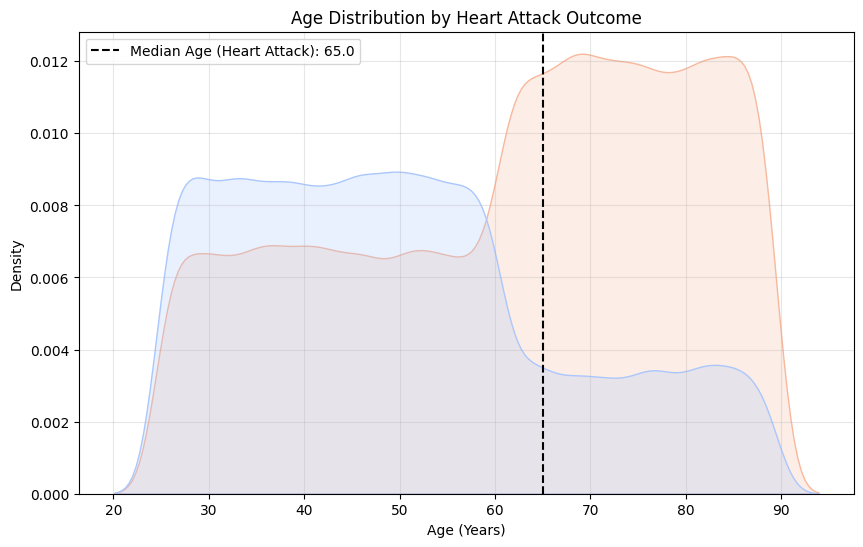

In [29]:

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="Age",
    hue="Heart_Attack_Outcome",
    shade=True,
    bw_adjust=0.8,
    palette="coolwarm"
)

# Median age of patients with heart attack
median_age = df[df["Heart_Attack_Outcome"] == 1]["Age"].median()
plt.axvline(median_age, color="black", linestyle="--", label=f"Median Age (Heart Attack): {median_age:.1f}")

plt.title("Age Distribution by Heart Attack Outcome")
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Heatmap — Correlation of Risk Factors

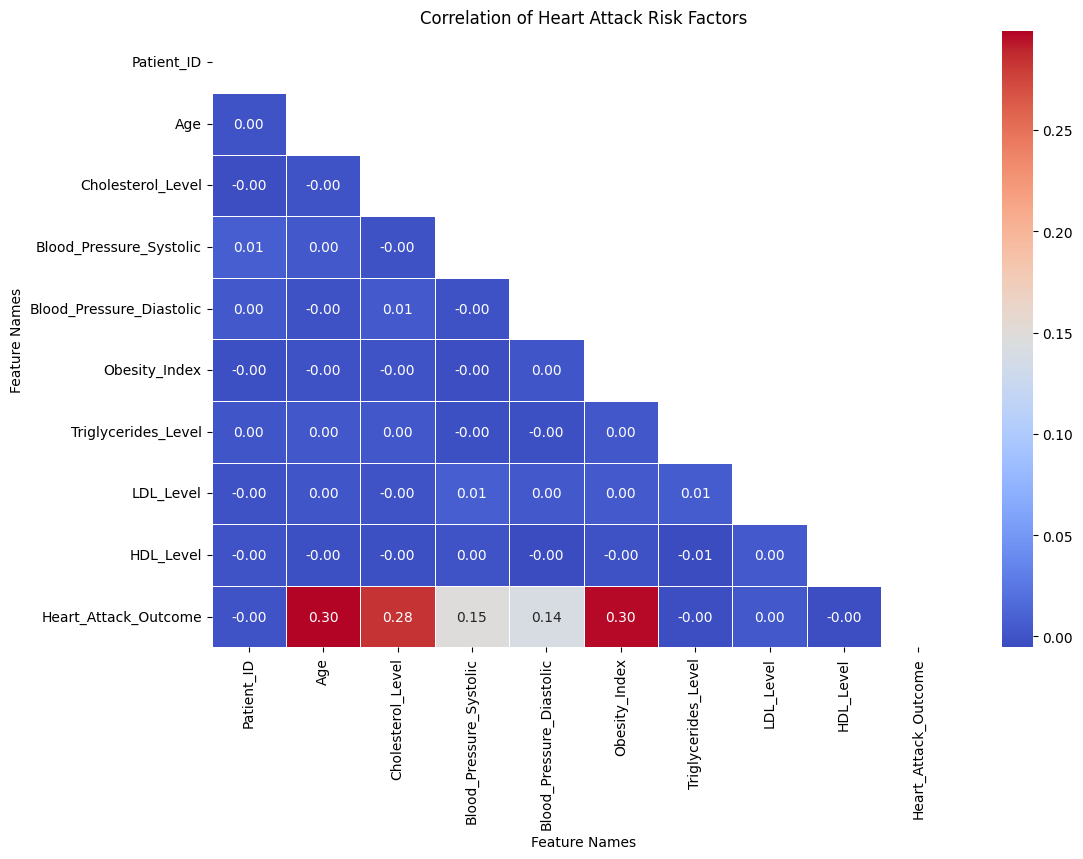

In [30]:

plt.figure(figsize=(12, 8))

corr = df.corr(numeric_only=True)

mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    linewidths=.5,
    fmt=".2f"
)

plt.title("Correlation of Heart Attack Risk Factors")
plt.xlabel("Feature Names")
plt.ylabel("Feature Names")
plt.show()

Boxplot — Cholesterol Levels by Heart Attack Outcome & Gender

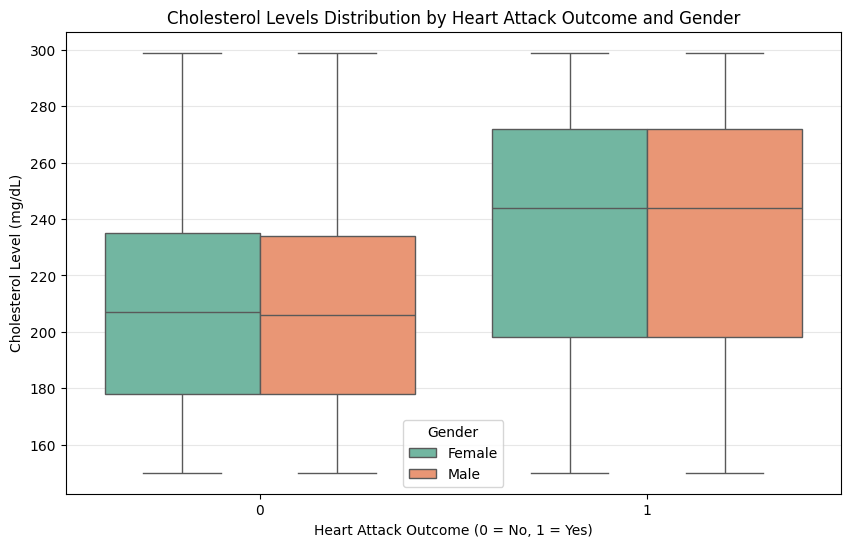

In [31]:

plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Heart_Attack_Outcome",
    y="Cholesterol_Level",
    hue="Gender",
    showfliers=True,
    whis=1.5,
    palette="Set2"
)

plt.title("Cholesterol Levels Distribution by Heart Attack Outcome and Gender")
plt.xlabel("Heart Attack Outcome (0 = No, 1 = Yes)")
plt.ylabel("Cholesterol Level (mg/dL)")
plt.grid(axis='y', alpha=0.3)
plt.show()

Pairplot — Multiple Risk Factors & Outcome

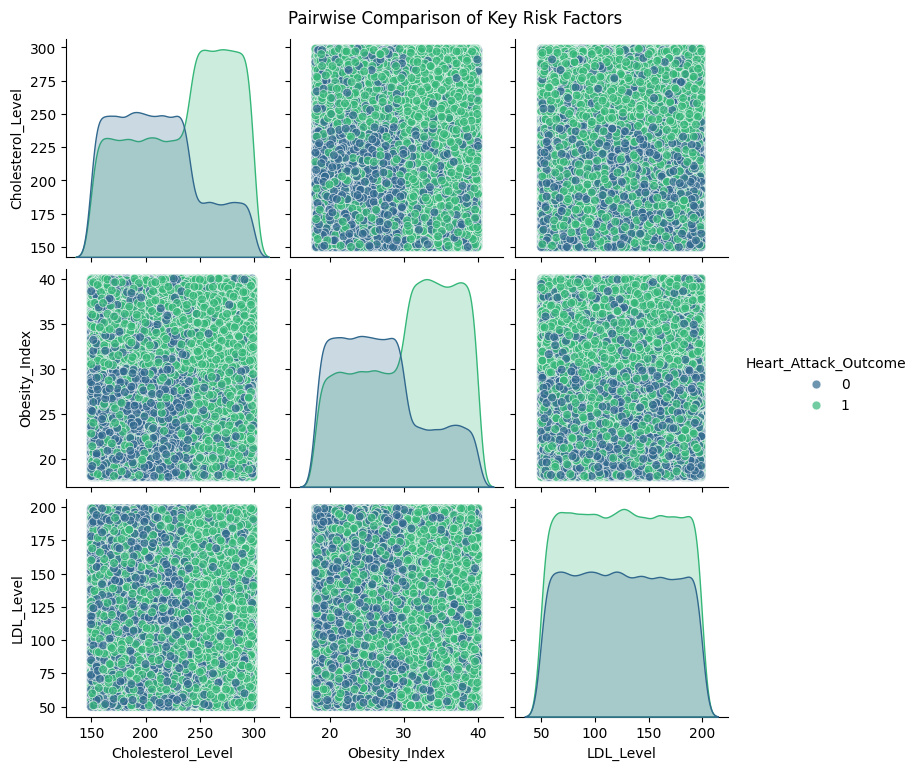

In [34]:

sns.pairplot(
    df[["Cholesterol_Level", "Obesity_Index", "LDL_Level", "Heart_Attack_Outcome"]],
    hue="Heart_Attack_Outcome",
    diag_kind="kde",
    height=2.5,
    plot_kws={"s": 40, "alpha": 0.7},
    palette="viridis"
)

plt.suptitle("Pairwise Comparison of Key Risk Factors", y=1.02)
plt.show()

Violin Plot — Blood Pressure by Heart Attack Outcome

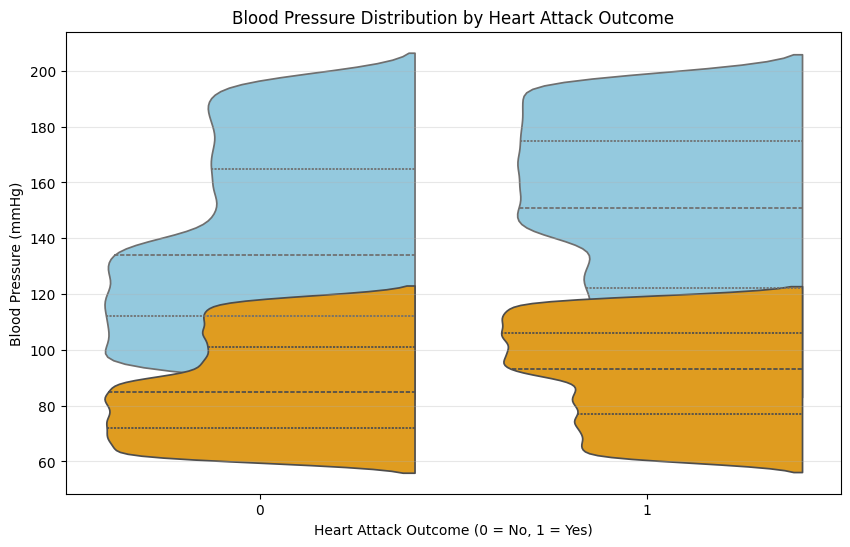

In [35]:

plt.figure(figsize=(10, 6))
sns.violinplot(
    data=df,
    x="Heart_Attack_Outcome",
    y="Blood_Pressure_Systolic",
    split=True,
    inner="quartile",
    color="skyblue"
)

sns.violinplot(
    data=df,
    x="Heart_Attack_Outcome",
    y="Blood_Pressure_Diastolic",
    split=True,
    inner="quartile",
    color="orange"
)

plt.title("Blood Pressure Distribution by Heart Attack Outcome")
plt.xlabel("Heart Attack Outcome (0 = No, 1 = Yes)")
plt.ylabel("Blood Pressure (mmHg)")
plt.grid(axis='y', alpha=0.3)
plt.show()

Countplot — Smoking Status & Heart Attack Outcome by Gender

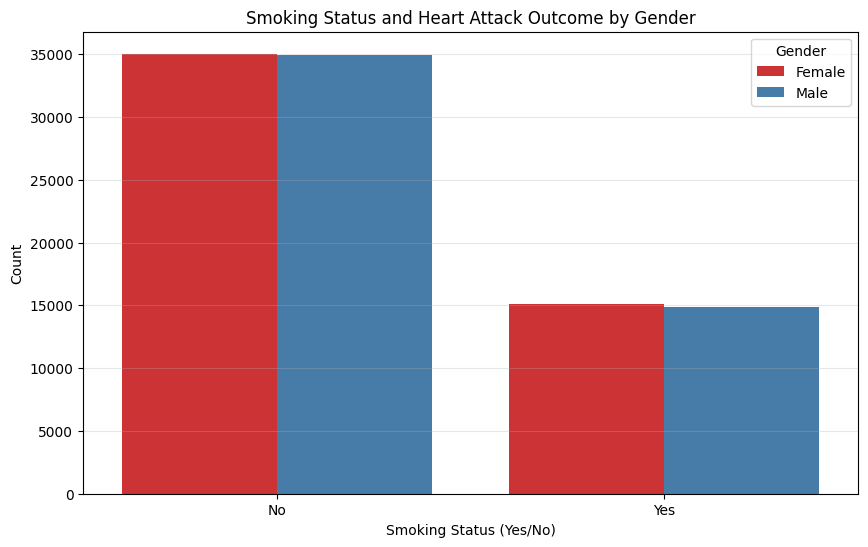

In [36]:

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="Smoking_Status",
    hue="Gender",
    palette="Set1"
)

plt.title("Smoking Status and Heart Attack Outcome by Gender")
plt.xlabel("Smoking Status (Yes/No)")
plt.ylabel("Count")
plt.grid(axis='y', alpha=0.3)
plt.show()